<a href="https://colab.research.google.com/github/kavya2915/BirthRateAnalysis-Prediction/blob/main/BirthRateAnalysis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
births = pd.read_csv("births.csv")

In [17]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [18]:
births['decade'] = 10*(births['year']//10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


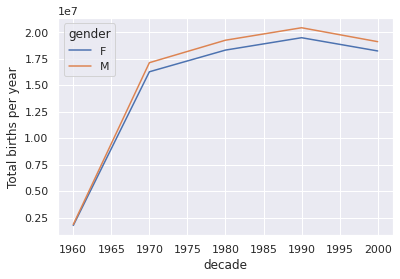

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
births_decade =births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
births_decade.plot()
plt.ylabel("Total births per year")
plt.show()

In [27]:
import numpy as np
quartiles = np.percentile(births['births'],[25,50,75])
mean = quartiles[1]
sig = 0.74* (quartiles[1]- quartiles[0])

In [29]:
births = births.query('(births > @ mean - 5 * @sig) & (births < @ mean + 5 * @sig)')
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day,
                              format='%Y%m%d')
births['day of week'] = births.index.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


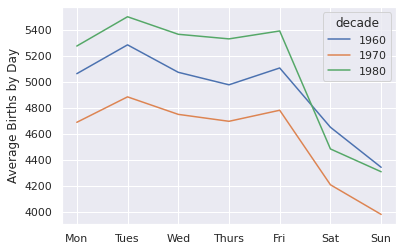

In [30]:
births_day = births.pivot_table('births', index='day of week',
                                columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day.plot()
plt.ylabel("Average Births by Day")
plt.show()


In [31]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


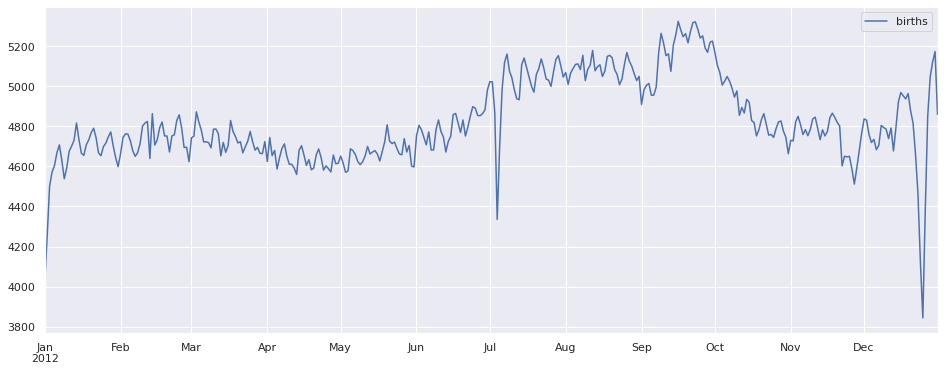

In [34]:
fig, ax = plt.subplots(figsize=(16, 6))
births_month.plot(ax=ax)
plt.show()